### This is good, final code for QP2 legendre stuff.  
final as of 5/15

In [1]:
import os
import pandas as pd
import numpy as np
import re
import json
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook




In [2]:
fname = "c:/Python27/qp2_py/features_for_models/baseline_50.csv"
with open(fname) as infile:
    data = infile.readlines()

In [3]:
features = pd.read_csv("c:/Python27/qp2_py/features_for_models/baseline_50.csv")

In [4]:
features = features.drop("Unnamed: 0", 1)
features

,Syl_Per_Speaker,minF0,maxF0,meanF0,meanStd,meanZnorm,Total_Whispered
0,4.449733,1.642243,6.305370,0.186416,4.609855,-0.186544,12
1,3.726221,3.979432,6.293839,0.247727,4.804718,-0.150966,8
2,3.366413,3.979326,6.288945,0.247534,5.017004,-0.289292,0
3,2.982662,3.983007,6.281454,0.241353,5.119777,-0.406997,0
4,3.803746,3.978059,5.735466,0.140937,4.738914,-0.137249,2
5,4.252642,3.981037,6.287604,0.140054,4.754662,-0.226808,6
6,3.345361,3.975805,6.276253,0.282529,5.079049,0.034359,3
7,3.803029,3.980178,6.188084,0.144884,4.762278,0.189347,5
8,4.506203,3.978750,6.245704,0.100664,4.513169,0.153678,1
9,3.156044,3.986178,6.288051,0.166907,5.136865,-0.302337,0


In [5]:
##### 4/20 this works now #########

label_csv = pd.read_csv("c:/Python27/qp2_py/labels/devlabels50.csv")



features["labels"] = label_csv["Language"]
print features



    Syl_Per_Speaker     minF0     maxF0    meanF0   meanStd  meanZnorm  \
0          4.449733  1.642243  6.305370  0.186416  4.609855  -0.186544   
1          3.726221  3.979432  6.293839  0.247727  4.804718  -0.150966   
2          3.366413  3.979326  6.288945  0.247534  5.017004  -0.289292   
3          2.982662  3.983007  6.281454  0.241353  5.119777  -0.406997   
4          3.803746  3.978059  5.735466  0.140937  4.738914  -0.137249   
5          4.252642  3.981037  6.287604  0.140054  4.754662  -0.226808   
6          3.345361  3.975805  6.276253  0.282529  5.079049   0.034359   
7          3.803029  3.980178  6.188084  0.144884  4.762278   0.189347   
8          4.506203  3.978750  6.245704  0.100664  4.513169   0.153678   
9          3.156044  3.986178  6.288051  0.166907  5.136865  -0.302337   
10         2.948516  3.979934  6.244384  0.213999  5.098003  -0.229735   
11         3.373189  3.978571  6.281436  0.190771  5.265107   0.370599   
12         4.406870  3.977100  5.94059

In [6]:


labels = (features[features.columns[7]])
data_features =(features[features.columns[:7]])
print labels

#X_train= x_train[:37]
#X_test = x_train[37:51]

#print X_test


#y_train = labels[:37]
#y_test = labels[37:51]

#print X_train, y_train, X_test, y_test




0      English
1      English
2      English
3      English
4     Mandarin
5     Mandarin
6     Mandarin
7     Mandarin
8      English
9      English
10    Mandarin
11     English
12     English
13     English
14     English
15    Mandarin
16     English
17     English
18     English
19     English
20     English
21     English
22     English
23    Mandarin
24     English
25     English
26     English
27     English
28     English
29    Mandarin
30     English
31    Mandarin
32    Mandarin
33    Mandarin
34    Mandarin
35    Mandarin
36    Mandarin
37    Mandarin
38    Mandarin
39    Mandarin
40    Mandarin
41    Mandarin
42    Mandarin
43    Mandarin
44    Mandarin
45    Mandarin
46    Mandarin
47    Mandarin
48    Mandarin
49     English
Name: labels, dtype: object


## Write baseline features to csv for building models in the future

In [7]:
data_features.to_csv("c:/Python27/qp2_py/features_for_models/baseline_50.csv")
labels.to_csv("c:/Python27/qp2_py/features_for_models/labels_50.csv")

# Let's build some baseline models
5/20/2016


### Let's do some motherfuckin' GridSearching of paramaters
- This is actually working pretty well.  If we use SVC (which is a kernel SVM, and SVMs are good) baseline is like 69%

In [43]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}



#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, random_state=0)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 1}
0.837837837838


### The model below performs the best, SVC with C and gamma set from running GridSearch above
- So my acoustic baseline performs around 70%, which is where it should be
- No idea why SVM works better than Linear SVC or LogisticRegession, except that I guess the data here is better divided by curves rather than divides by straight lines?  
- One day, visualizing any of this would be nice


In [20]:
### probably don't need to run
path = "c:/Python27/qp2_py/legendre_polynomials/legendre/"
all_ipu_files = os.listdir(path)
for item in all_ipu_files:
    fname = path+item
    with open(fname) as infile:
        text = infile.readlines()
        print len(text)

1589
1035
473
432
394
292
169
360
164
74
144
421
610
180
248
294
563
112
328
400
111
274
341
244
125
662
821
619
583
799
1041
694
462
823
716
244
790
281
1373
121
502
653
335
627
196
841
401
608
507
310


In [8]:
def getLegendre():
    interlist = []
    all_ipu_coefs = []
    path = "c:/Python27/qp2_py/legendre_polynomials/legendre/"
    item = "ipu_speaker"
    all_ipu_files = os.listdir(path)
    for i in range(len(all_ipu_files)):
        fname = path+item+str(i)+".txt"      
        with open(fname) as infile:
            text = infile.read()
            regexp = r'-?\d+\.\d+'
            linexp = re.compile(regexp)
            strnum = linexp.findall(text)
            data = np.array(strnum).astype(float)
            data = np.array(strnum).astype(float).reshape(-1,6)
            all_ipu_coefs.append(data)
        
   
    return all_ipu_coefs


all_ipu_data = getLegendre()

In [9]:
all_ipu_coefs = []
inter = []
for item in all_ipu_data:
    for leg in item:
        five_degree = list(leg)
        inter.append(five_degree)
    all_ipu_coefs.append(inter)
    inter = []

In [10]:
all_ipu_coefs[0]

[[134.62287670000001,
  50.559266979999997,
  -74.922264999999996,
  -31.83351386,
  -96.692665259999998,
  -35.27829285],
 [110.49352292,
  20.073714949999999,
  -52.201617130000002,
  -7.1509720799999998,
  -57.988108939999996,
  48.884468089999999],
 [62.280952310000004,
  -2.6146652800000001,
  -106.62518206,
  0.20312389,
  40.923300269999999,
  8.6019440100000004],
 [72.911107189999996,
  -16.548046150000001,
  -47.768042989999998,
  27.462234800000001,
  -5.8238106500000004,
  50.28390864],
 [71.929552180000002,
  -21.257097479999999,
  -47.597274759999998,
  0.61060844999999997,
  -41.56645477,
  20.855412749999999],
 [81.263026199999999,
  2.3064941000000001,
  -26.917937420000001,
  7.3635058000000004,
  -35.475795089999998,
  3.3023206799999998],
 [100.78373861999999,
  51.529789110000003,
  13.76601541,
  -50.464502070000002,
  57.452038270000003,
  -44.77558758],
 [81.646349580000006,
  15.722287590000001,
  -3.1713694399999999,
  -63.019293429999998,
  45.26611724,
  -5.0

In [15]:
#print ipu_f0s[49][74]

fpath = "c:/Python27/qp2_py/legendre_polynomials/ipu_speaker"
speaker_ipu = ipu_f0s[49]
fname = fpath+"49"+".txt"
outfile = open(fname, "w")
degree = 5

for i in range(len(speaker_ipu)):
    start = speaker_ipu[i][0]
    end = speaker_ipu[i][1]
    f0s = speaker_ipu[i][2]
    words = speaker_ipu[i][3]
    print i
    x_time = []
    for j in range(len(f0s)):
        x_time.append(start+(0.01*j))
    fit = L.fit(x_time, f0s, degree)
    entry = str(fit)+"\n"
    outfile.write(entry)
outfile.close()
print "file %d has been written to %s"%(k, fname)
#fit = None

In [17]:
######## get the polynomial coefficients ################
## can get individual coefficients with .coef[idx]
####### FOLLOW THE FORMAT BELOW ######
## legendreitem = legendre_list[idx_of_file][ipu]
## degree from above

print len(legendre_list)
x =  legendre_list[0][0]
print x
print x.coef[1]

all_ipu_coefs = []
inter = []
for item in legendre_list:
    for i in range(len(item)):
        ipu = item[i]
        ipu_coefs = [ipu.coef[j] for j in range(degree)]
        inter.append(ipu_coefs)
    all_ipu_coefs.append(inter)
    inter = []
print len(all_ipu_coefs)

50
leg([ 134.6228767    50.55926698  -74.922265    -31.83351386  -96.69266526
  -35.27829285])
50.5592669766
50


## TO DO IN THIS CELL:
- write coefs out to files, to send to Weise for Frechet Distance modeling
- QUESTION COEFS, NOT IPU COEFS


# Build Clusters (below)

In [69]:
all_ipu_coefs[0]

[[134.62287670000001,
  50.559266979999997,
  -74.922264999999996,
  -31.83351386,
  -96.692665259999998,
  -35.27829285],
 [110.49352292,
  20.073714949999999,
  -52.201617130000002,
  -7.1509720799999998,
  -57.988108939999996,
  48.884468089999999],
 [62.280952310000004,
  -2.6146652800000001,
  -106.62518206,
  0.20312389,
  40.923300269999999,
  8.6019440100000004],
 [72.911107189999996,
  -16.548046150000001,
  -47.768042989999998,
  27.462234800000001,
  -5.8238106500000004,
  50.28390864],
 [71.929552180000002,
  -21.257097479999999,
  -47.597274759999998,
  0.61060844999999997,
  -41.56645477,
  20.855412749999999],
 [81.263026199999999,
  2.3064941000000001,
  -26.917937420000001,
  7.3635058000000004,
  -35.475795089999998,
  3.3023206799999998],
 [100.78373861999999,
  51.529789110000003,
  13.76601541,
  -50.464502070000002,
  57.452038270000003,
  -44.77558758],
 [81.646349580000006,
  15.722287590000001,
  -3.1713694399999999,
  -63.019293429999998,
  45.26611724,
  -5.0

In [11]:
import numpy as np
all_L_stacked = np.vstack(all_ipu_coefs)
all_L_stacked.shape

##rows are each legendre coefficient ipu-representation, columns are each individual coefficient

(12119L, 6L)

In [12]:
all_L_stacked.std(axis=0)

array([ 48.9055721 ,  52.22604182,  58.23364822,  55.91794797,
        57.64364986,  56.71828504])

In [13]:
all_L_stacked.std(axis=0)  ## use as a feature for per-speaker features, as well
### stds are widly different, so we could really benefit from some normalization, which we do in the next cell

array([ 48.9055721 ,  52.22604182,  58.23364822,  55.91794797,
        57.64364986,  56.71828504])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_L_stacked)
scaledLstack = scaler.transform(all_L_stacked)
scaledLstack.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
pca.fit(scaledLstack)
pca_Legendres = pca.transform(scaledLstack)

<IPython.core.display.Javascript object>


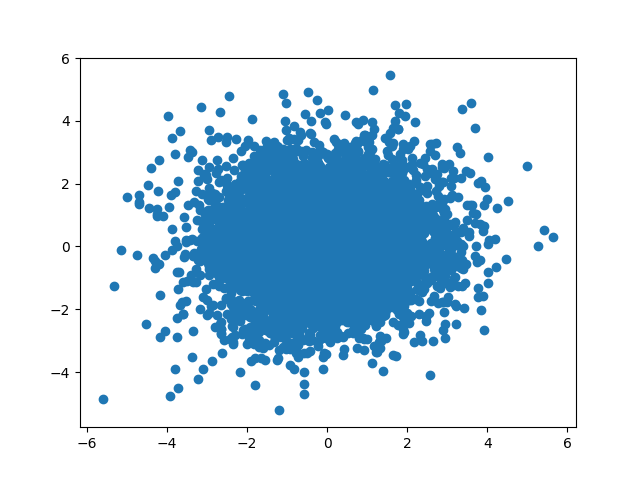

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.scatter(pca_Legendres[:,0],pca_Legendres[:,1])

##PCA Scatterplot of first and second principle components (dots are polynomials)

In [19]:
from sklearn.cluster import KMeans
from sklearn.cross_validation import ShuffleSplit
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

In [20]:
means = []
### Cluster the polynomials 

#from sklearn.cluster import AgglomerativeClustering
for j in range(10, 100, 10):
    print "iteration "+str(j)
    cluster = KMeans(n_clusters=j)
    #cluster = AgglomerativeClustering()

    cluster.fit(scaledLstack)
    cluster.cluster_centers_
    #cluster.labels_
    speaker_ipu_histograms = []
    for speaker in all_ipu_coefs:
        scaled_ipu = scaler.transform(speaker)
        ipu_centers = cluster.predict(scaled_ipu)
        histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
        #histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
        speaker_ipu_histograms.append(histo / float(histo.sum()))

    legendre_features = pd.concat([features,pd.DataFrame(speaker_ipu_histograms, columns=["cluster%d" % i for i in range(j)])], axis=1)
    only_legendre = pd.DataFrame(speaker_ipu_histograms, columns=["cluster%d" % i for i in range(j)])
    fout = "c:/Python27/qp2_py/legendre_polynomials/only_legendre_k"+str(j)+".csv"
    only_legendre.to_csv(fout)

    #feature_columns = [col for col in list(legendre_features.columns) if col!= "labels"]
    #baseline_legendre =(legendre_features[feature_columns])
    #fout = "c:/Python27/qp2_py/legendre_polynomials/baseline_legendre_k"+str(j)+".csv"
    #baseline_legendre.to_csv(fout)

    ##### classification time#######
    #classifier = SVC(C=10, gamma=1)
    classifier = SVC(C=1, gamma=100)
    #from sklearn.cross_validation import ShuffleSplit
    shuffle_split = ShuffleSplit(50, n_iter= 10, test_size=.25, train_size=.75)
    #shuffle_score = cross_val_score(classifier, baseline_legendre, labels, cv=shuffle_split)
    shuffle_score = cross_val_score(classifier, only_legendre, labels, cv=shuffle_split)
    #print shuffle_score
    mean = shuffle_score.mean()
    means.append(mean)

iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90


In [21]:
print means

[0.49230769230769234, 0.56153846153846154, 0.63846153846153841, 0.57692307692307687, 0.56153846153846154, 0.60769230769230764, 0.6692307692307693, 0.59230769230769231, 0.63846153846153852]


final number: k=20, C=1 gamma = 100, 

we get a total mean accuracy of 0.66923076923076918

- Fun fact - I can get the same number with k=70, (same params), accuracy of 0.6692307692307693
- Which is proooooobably some bullshit.

<IPython.core.display.Javascript object>


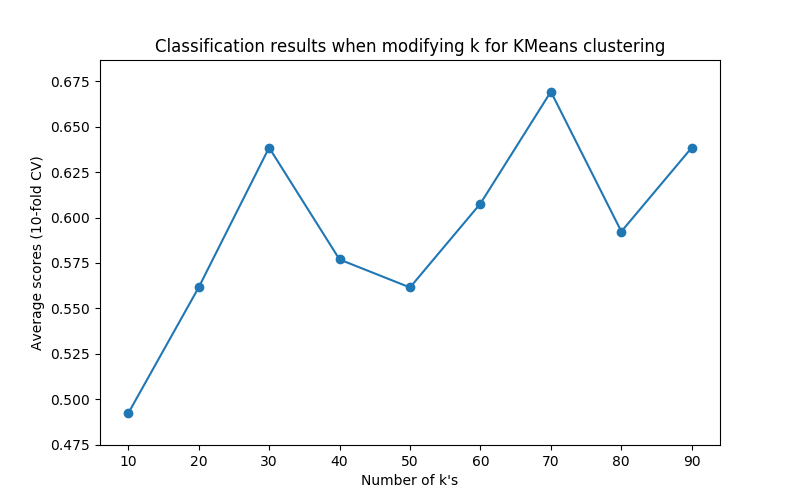

In [22]:
iters = [10,20,30,40,50,60,70,80,90]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(iters, means)
ax.plot(iters, means)
ax.set_xlabel("Number of k's")
ax.set_ylabel("Average scores (10-fold CV)")
ax.set_title("Classification results when modifying k for KMeans clustering")





In [23]:
base = pd.read_csv("c:/Python27/qp2_py/features_for_models/baseline_50.csv")
base = base.drop("Unnamed: 0", 1)
base

,Syl_Per_Speaker,minF0,maxF0,meanF0,meanStd,meanZnorm,Total_Whispered
0,4.449733,1.642243,6.305370,0.186416,4.609855,-0.186544,12
1,3.726221,3.979432,6.293839,0.247727,4.804718,-0.150966,8
2,3.366413,3.979326,6.288945,0.247534,5.017004,-0.289292,0
3,2.982662,3.983007,6.281454,0.241353,5.119777,-0.406997,0
4,3.803746,3.978059,5.735466,0.140937,4.738914,-0.137249,2
5,4.252642,3.981037,6.287604,0.140054,4.754662,-0.226808,6
6,3.345361,3.975805,6.276253,0.282529,5.079049,0.034359,3
7,3.803029,3.980178,6.188084,0.144884,4.762278,0.189347,5
8,4.506203,3.978750,6.245704,0.100664,4.513169,0.153678,1
9,3.156044,3.986178,6.288051,0.166907,5.136865,-0.302337,0


In [24]:
clus_features = pd.read_csv("c:/Python27/qp2_py/legendre_polynomials/add_to_baseline/only_legendre_k70.csv")
clus_features = clus_features.drop("Unnamed: 0",1)
clus_features

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,...,cluster60,cluster61,cluster62,cluster63,cluster64,cluster65,cluster66,cluster67,cluster68,cluster69
0,0.017722,0.064557,0.001266,0.003797,0.003797,0.029114,0.000000,0.010127,0.001266,0.003797,...,0.050633,0.000000,0.005063,0.051899,0.000000,0.113924,0.003797,0.016456,0.005063,0.000000
1,0.017510,0.040856,0.003891,0.000000,0.007782,0.052529,0.007782,0.009728,0.017510,0.007782,...,0.044747,0.003891,0.011673,0.029183,0.003891,0.048638,0.013619,0.019455,0.001946,0.000000
2,0.013115,0.019672,0.003279,0.009836,0.016393,0.022951,0.009836,0.019672,0.016393,0.029508,...,0.009836,0.006557,0.026230,0.013115,0.029508,0.006557,0.016393,0.009836,0.013115,0.003279
3,0.000000,0.008197,0.000000,0.008197,0.008197,0.057377,0.040984,0.008197,0.000000,0.040984,...,0.008197,0.016393,0.016393,0.008197,0.024590,0.000000,0.008197,0.032787,0.016393,0.000000
4,0.022346,0.064246,0.000000,0.002793,0.000000,0.053073,0.000000,0.008380,0.000000,0.000000,...,0.027933,0.005587,0.013966,0.039106,0.000000,0.111732,0.000000,0.033520,0.000000,0.000000
5,0.009569,0.105263,0.000000,0.000000,0.004785,0.016746,0.000000,0.028708,0.000000,0.007177,...,0.052632,0.000000,0.014354,0.043062,0.002392,0.095694,0.004785,0.045455,0.000000,0.000000
6,0.000000,0.015075,0.010050,0.015075,0.005025,0.015075,0.010050,0.020101,0.000000,0.010050,...,0.010050,0.005025,0.050251,0.005025,0.035176,0.040201,0.015075,0.020101,0.000000,0.030151
7,0.009934,0.079470,0.000000,0.000000,0.003311,0.043046,0.000000,0.003311,0.000000,0.000000,...,0.046358,0.000000,0.009934,0.016556,0.003311,0.062914,0.003311,0.029801,0.000000,0.000000
8,0.000000,0.051181,0.000000,0.000000,0.000000,0.019685,0.000000,0.000000,0.000000,0.000000,...,0.070866,0.000000,0.000000,0.047244,0.000000,0.114173,0.000000,0.011811,0.000000,0.000000
9,0.000000,0.019355,0.000000,0.012903,0.012903,0.006452,0.025806,0.032258,0.006452,0.045161,...,0.000000,0.025806,0.090323,0.000000,0.006452,0.012903,0.006452,0.006452,0.000000,0.006452


In [25]:
baseleg = base.join(clus_features, how="right")

In [26]:
baseleg

,Syl_Per_Speaker,minF0,maxF0,meanF0,meanStd,meanZnorm,Total_Whispered,cluster0,cluster1,cluster2,...,cluster60,cluster61,cluster62,cluster63,cluster64,cluster65,cluster66,cluster67,cluster68,cluster69
0,4.449733,1.642243,6.305370,0.186416,4.609855,-0.186544,12,0.017722,0.064557,0.001266,...,0.050633,0.000000,0.005063,0.051899,0.000000,0.113924,0.003797,0.016456,0.005063,0.000000
1,3.726221,3.979432,6.293839,0.247727,4.804718,-0.150966,8,0.017510,0.040856,0.003891,...,0.044747,0.003891,0.011673,0.029183,0.003891,0.048638,0.013619,0.019455,0.001946,0.000000
2,3.366413,3.979326,6.288945,0.247534,5.017004,-0.289292,0,0.013115,0.019672,0.003279,...,0.009836,0.006557,0.026230,0.013115,0.029508,0.006557,0.016393,0.009836,0.013115,0.003279
3,2.982662,3.983007,6.281454,0.241353,5.119777,-0.406997,0,0.000000,0.008197,0.000000,...,0.008197,0.016393,0.016393,0.008197,0.024590,0.000000,0.008197,0.032787,0.016393,0.000000
4,3.803746,3.978059,5.735466,0.140937,4.738914,-0.137249,2,0.022346,0.064246,0.000000,...,0.027933,0.005587,0.013966,0.039106,0.000000,0.111732,0.000000,0.033520,0.000000,0.000000
5,4.252642,3.981037,6.287604,0.140054,4.754662,-0.226808,6,0.009569,0.105263,0.000000,...,0.052632,0.000000,0.014354,0.043062,0.002392,0.095694,0.004785,0.045455,0.000000,0.000000
6,3.345361,3.975805,6.276253,0.282529,5.079049,0.034359,3,0.000000,0.015075,0.010050,...,0.010050,0.005025,0.050251,0.005025,0.035176,0.040201,0.015075,0.020101,0.000000,0.030151
7,3.803029,3.980178,6.188084,0.144884,4.762278,0.189347,5,0.009934,0.079470,0.000000,...,0.046358,0.000000,0.009934,0.016556,0.003311,0.062914,0.003311,0.029801,0.000000,0.000000
8,4.506203,3.978750,6.245704,0.100664,4.513169,0.153678,1,0.000000,0.051181,0.000000,...,0.070866,0.000000,0.000000,0.047244,0.000000,0.114173,0.000000,0.011811,0.000000,0.000000
9,3.156044,3.986178,6.288051,0.166907,5.136865,-0.302337,0,0.000000,0.019355,0.000000,...,0.000000,0.025806,0.090323,0.000000,0.006452,0.012903,0.006452,0.006452,0.000000,0.006452


In [28]:
from sklearn.cross_validation import train_test_split

In [30]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

#from sklearn.linear_model import LogisticRegression
#grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10)


X_train, X_test, y_train, y_test = train_test_split(baseleg, labels, random_state=0)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 1}
0.837837837838


#### Everything is horrible

In [146]:
labels41 = pd.read_csv("c:/Python27/qp2_py/labels/labels41_onlyqs.csv")
labels41

,Language
0,English
1,English
2,English
3,English
4,Mandarin
5,Mandarin
6,Mandarin
7,Mandarin
8,English
9,Mandarin


In [143]:
removed_idxs = [9, 16, 17, 19, 22, 26, 39, 42, 47]
only_legendre_qs = pd.read_csv("c:/Python27/qp2_py/legendre_polynomials/only_legendre_k20.csv")
del only_legendre_qs['Unnamed: 0']
only_legendre_qs.drop(removed_idxs, inplace=True)
only_legendre_qs= only_legendre_qs.reset_index(drop=True)

print only_legendre_qs

    cluster0  cluster1  cluster2  cluster3  cluster4  cluster5  cluster6  \
0   0.215190  0.008861  0.124051  0.008861  0.135443  0.055696  0.005063   
1   0.163424  0.013619  0.132296  0.013619  0.087549  0.042802  0.013619   
2   0.036066  0.032787  0.059016  0.045902  0.072131  0.075410  0.055738   
3   0.081967  0.065574  0.000000  0.016393  0.049180  0.057377  0.106557   
4   0.248603  0.002793  0.142458  0.008380  0.142458  0.053073  0.002793   
5   0.260766  0.002392  0.095694  0.000000  0.095694  0.083732  0.009569   
6   0.035176  0.025126  0.045226  0.055276  0.065327  0.075377  0.020101   
7   0.225166  0.006623  0.105960  0.000000  0.115894  0.039735  0.003311   
8   0.236220  0.000000  0.275591  0.000000  0.129921  0.000000  0.000000   
9   0.046809  0.017021  0.029787  0.034043  0.046809  0.072340  0.106383   
10  0.004630  0.013889  0.013889  0.050926  0.032407  0.087963  0.069444   
11  0.142132  0.000000  0.269036  0.010152  0.131980  0.010152  0.015228   
12  0.013699

In [147]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(C =1)

shuffle_split = ShuffleSplit(41, n_iter= 10, test_size=.25, train_size=.75)
shuffle_score = cross_val_score(classifier, only_legendre_qs, labels41, cv=shuffle_split)
print shuffle_score
print shuffle_score.mean()

[ 0.63636364  0.36363636  0.45454545  0.45454545  0.36363636  0.54545455
  0.45454545  0.45454545  0.36363636  0.27272727]
0.436363636364


C:\Users\Rachel\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(only_legendre_qs, labels41, test_size = 0.25, random_state=0)

clf = LinearSVC().fit(X_train, y_train)
score = clf.score(X_test, y_test)

#classifier = linear_model.LogisticRegression()
#classifier = svm.LinearSVC()
#classifier.fit(X_train, y_train)
#score = classifier.score(X_test, y_test)
predicts = clf.predict(X_test)

print score, predicts

0.272727272727 ['Mandarin' 'English' 'English' 'Mandarin' 'English' 'English' 'English'
 'Mandarin' 'English' 'English' 'English']


In [156]:
print clf.classes_

['English' 'Mandarin']


In [157]:
clusterNames = only_legendre_qs.columns.values
n=4
coefs_with_fns = sorted(zip(clf.coef_[0], clusterNames))
top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    print "\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2)

	-0.7153	cluster6       		0.7470	cluster5       
	-0.5348	cluster11      		0.4811	cluster18      
	-0.5047	cluster8       		0.4079	cluster10      
	-0.3104	cluster13      		0.3775	cluster0       


In [158]:
all_centers = cluster.cluster_centers_
man_centers = [all_centers[4], all_centers[5], all_centers[2]]
eng_centers = [all_centers[0], all_centers[7], all_centers[3]]
plt_labels = ["1st", "2nd", "3rd"]

<IPython.core.display.Javascript object>


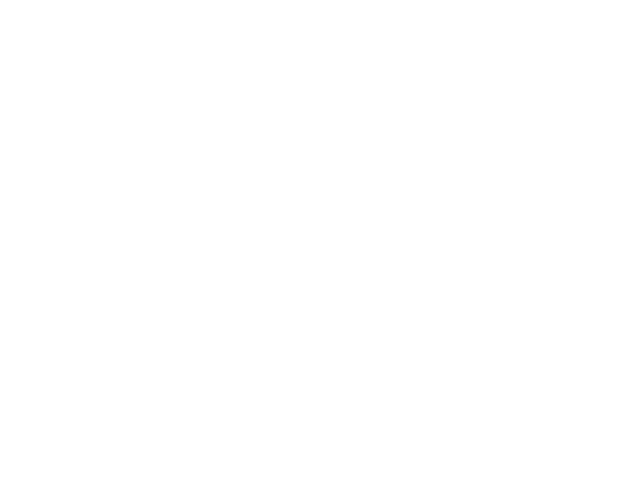

NameError: name 'L' is not defined

In [159]:

plt.figure()
for item in eng_centers:
    poly1 = L(item)
    x = [-1 + i/10.0 for i in range(20)]
    y = poly1(x)
    plt.plot(x,y, hold=True, linewidth=2.1)
    plt.title("Most Predictive Question Contour (Native Speakers)")
    plt.legend([x for x in plt_labels], loc=3)

plt.figure()
for item in man_centers:
    poly1 = L(item)
    x = [-1 + i/10.0 for i in range(20)]
    y = poly1(x)
    plt.plot(x,y, hold=True, linewidth=2.1)
    plt.title("Most Predictive Question Contour (Non-Native Speakers)")
    plt.legend([x for x in plt_labels], loc=4)

In [38]:
classifier = SVC(C=10, gamma=1)
from sklearn.cross_validation import ShuffleSplit
shuffle_split = ShuffleSplit(50, n_iter= 10, test_size=.25, train_size=.75)
shuffle_score = cross_val_score(classifier, baseleg, labels, cv=shuffle_split)
print shuffle_score
print shuffle_score.mean()

[ 0.53846154  0.61538462  0.84615385  0.53846154  0.76923077  0.76923077
  0.92307692  0.69230769  0.92307692  0.61538462]
0.723076923077


- With SVC, C=10, gamma=1, combinine the baseline features with the best features from clustering (20), 
- Best number is 0.723076923077

In [75]:
### Cluster the polynomials 
from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering

cluster = KMeans(n_clusters=45)
#cluster = AgglomerativeClustering()

cluster.fit(scaledLstack)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=45, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
cluster.cluster_centers_
#cluster.labels_

array([[ -4.50044954e-01,   1.95989585e+00,   1.39177903e+00,
         -4.41433497e-01,  -4.53025094e-01,  -7.93219860e-01],
       [ -1.10654037e+00,  -6.46021362e-01,   5.96005899e-01,
          1.24250266e-01,  -8.93267295e-02,   5.15824801e-01],
       [ -1.93254204e-01,  -6.40373958e-01,  -1.23975704e-01,
         -8.09880462e-01,   9.92934439e-02,   9.20201330e-01],
       [  1.05152253e+00,   2.60700310e-01,   1.45615263e+00,
          1.85722732e+00,  -1.60903322e+00,  -1.40641914e+00],
       [  1.07216965e+00,   9.73759993e-01,  -5.06038736e-01,
          8.29575646e-01,  -6.79173849e-02,  -3.30178365e-01],
       [ -1.14182485e+00,  -6.90433102e-01,  -1.35157136e-01,
          9.87810054e-01,   5.76615761e-01,  -7.49640840e-01],
       [ -3.15325668e-01,   1.36805381e-02,  -2.38094070e-01,
         -1.38822668e-01,  -3.90204887e-01,  -1.80443098e-01],
       [ -5.29944698e-01,  -2.67146945e-01,   5.24449717e-01,
         -6.09701945e-01,   4.26979676e-01,  -3.57559597e-01],


In [77]:
print len(cluster.labels_)
n_clusters = len(cluster.labels_)

12119


<IPython.core.display.Javascript object>


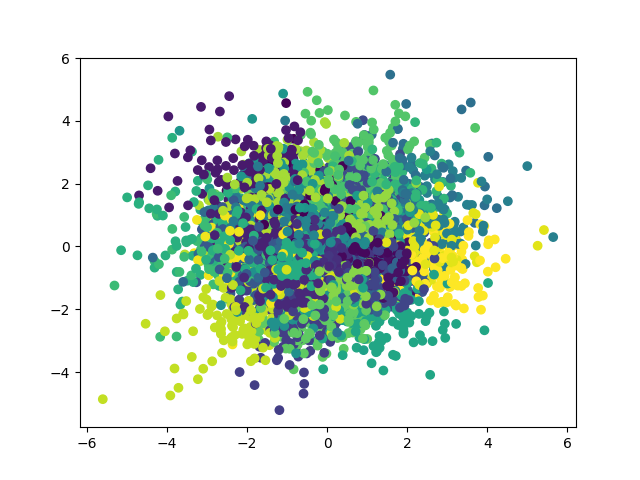

In [78]:
plt.figure()
plt.scatter(pca_Legendres[:,0],pca_Legendres[:,1], c=cluster.labels_)


In [79]:
speaker_ipu_histograms = []
for speaker in all_ipu_coefs:
    scaled_ipu = scaler.transform(speaker)
    ipu_centers = cluster.predict(scaled_ipu)
    histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
    #histo = np.bincount(ipu_centers, minlength=cluster.n_clusters) #set to to the clusteres we specificied before 
    speaker_ipu_histograms.append(histo / float(histo.sum()))

In [80]:
print speaker_ipu_histograms[0]

[ 0.0164557   0.04810127  0.03544304  0.          0.00379747  0.05063291
  0.12278481  0.08987342  0.00632911  0.06582278  0.00379747  0.00126582
  0.00126582  0.01265823  0.04683544  0.00379747  0.00506329  0.
  0.00253165  0.00126582  0.06708861  0.1         0.00126582  0.
  0.00253165  0.00632911  0.00379747  0.08101266  0.00379747  0.          0.
  0.00506329  0.          0.04683544  0.00506329  0.01139241  0.0556962
  0.05063291  0.00253165  0.00126582  0.00126582  0.02278481  0.00632911
  0.00379747  0.00379747]


<IPython.core.display.Javascript object>


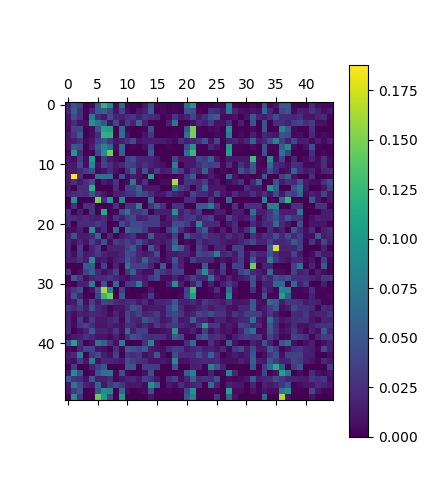

In [81]:
speaker_ipu_histograms

plt.matshow(speaker_ipu_histograms)
plt.colorbar()
#cmap="viridis"

<IPython.core.display.Javascript object>


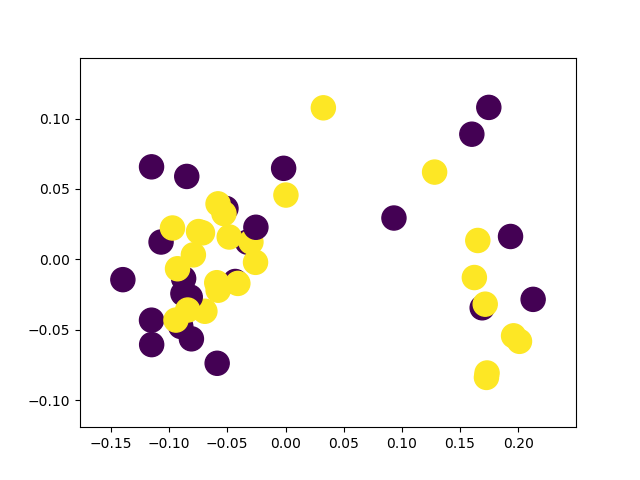

In [82]:
pca = PCA(n_components =2)
pca.fit(speaker_ipu_histograms)
pca_Histograms = pca.transform(speaker_ipu_histograms)
plt.figure()
plt.scatter(pca_Histograms[:,0],pca_Histograms[:,1], c=np.array(labels)=="Mandarin", s=300)

#######histogram scatterplot of what these things look like - needs a list of labels#

In [83]:
np.array(labels) == "Mandarin"

array([False, False, False, False,  True,  True,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False], dtype=bool)

# Add Legendre polynomial cluster histograms as features to baseline
## And then classify

In [84]:
### create feature vectors for each cluster for each speaker out of the histograms
legendre_features = pd.concat([features,pd.DataFrame(speaker_ipu_histograms, columns=["cluster%d" % i for i in range(45)])], axis=1)

In [85]:
only_legendre = pd.DataFrame(speaker_ipu_histograms, columns=["cluster%d" % i for i in range(45)])
print only_legendre


    cluster0  cluster1  cluster2  cluster3  cluster4  cluster5  cluster6  \
0   0.016456  0.048101  0.035443  0.000000  0.003797  0.050633  0.122785   
1   0.021401  0.056420  0.025292  0.001946  0.017510  0.052529  0.056420   
2   0.009836  0.042623  0.026230  0.000000  0.078689  0.022951  0.013115   
3   0.008197  0.024590  0.008197  0.008197  0.098361  0.073770  0.049180   
4   0.005587  0.036313  0.039106  0.000000  0.005587  0.047486  0.108939   
5   0.011962  0.028708  0.055024  0.000000  0.007177  0.023923  0.122010   
6   0.010050  0.015075  0.025126  0.005025  0.010050  0.035176  0.050251   
7   0.009934  0.052980  0.043046  0.000000  0.016556  0.049669  0.086093   
8   0.003937  0.098425  0.023622  0.000000  0.000000  0.039370  0.094488   
9   0.012903  0.006452  0.032258  0.006452  0.103226  0.000000  0.032258   
10  0.012766  0.012766  0.042553  0.008511  0.089362  0.008511  0.038298   
11  0.013889  0.013889  0.023148  0.032407  0.046296  0.004630  0.009259   
12  0.015228

In [86]:
###add it to the baseline
feature_columns = [col for col in list(legendre_features.columns) if col!= "labels"]
baseline_legendre =(legendre_features[feature_columns])
#print baseline_legendre

In [156]:
baseline_legendre.to_csv("c:/Python27/qp2_py/features_for_models/baseline_legendre_k45.csv")

In [87]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

C:\Users\Rachel\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [121]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

#from sklearn.linear_model import LogisticRegression
#grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10)


X_train, X_test, y_train, y_test = train_test_split(only_legendre, labels, random_state=0)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 100}
0.756756756757


In [88]:
#data_features = baseline alone
#baseline_legendres = baseline + legendre

from sklearn.cross_validation import ShuffleSplit
from sklearn.svm import SVC
classifier = SVC(C=10, gamma=1)
from sklearn.cross_validation import ShuffleSplit
shuffle_split = ShuffleSplit(50, n_iter= 10, test_size=.25, train_size=.75)
shuffle_score = cross_val_score(classifier, baseline_legendre, labels, cv=shuffle_split)
print shuffle_score
print shuffle_score.mean()

[ 0.61538462  0.46153846  0.61538462  0.61538462  0.76923077  0.61538462
  0.76923077  0.46153846  0.61538462  0.69230769]
0.623076923077


#### Some basic results from what I think it the best 
##### With SVC classifier
- Just baseline shufflescore mean baseline runs
    - .684, .674, .669, .723, .7
- k3 shufflescore mean baseline plus legendre runs
    - .692, .623, .669, .692, .59
- k7 shufflescore mean baseline plus legendre runs
    - .59, .63, .60, .6, .63
- k45 shufflescore mean baseline plus legendre runs
    - .72, .72, .65, .70, .63
- k60 shufflescore mean baseline plus legendres runs
    - .67, .65, .63, .67, .66
    
  



In [78]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
classifier = LogisticRegression(C = .01)


from sklearn.cross_validation import ShuffleSplit
shuffle_split = ShuffleSplit(50, n_iter= 10, test_size=.25, train_size=.75)
shuffle_score = cross_val_score(classifier, data_features, labels, cv=shuffle_split)
print shuffle_score
print shuffle_score.mean()

[ 0.69230769  0.69230769  0.38461538  0.53846154  0.61538462  0.46153846
  0.61538462  0.30769231  0.46153846  0.76923077]
0.553846153846


#### Results with LogisticRegression
- k7 means baseline 5 runs: 
    - .653, .7, .71, .73, .71
- k7 means baseline + legendre, 5 runs:
    - .69, .63, .76, .67, .72

## some tuning results 
- A higher k of clusters combined with the baseline yeilds results comperable to the baseline alone 
- Baseline + legendre cluster feature are pretty much the same as just baseline when we get to k=45  
    - With a SVC classifier with tuning C = 10, gamma = 1
- After retuning the SVM classifier, just the clustering features yeild results comperable to the baseline alone and the baseline plus the clustering features.
    - with an SVC classifier with tuning C = 1, gamma = 100
    - this tuning tanks baseline and baseline + clustering features
- That's really ineresting, becasue it really demonstrates that these contour features are capturing solid information about the pitch signal
    - But maybe it's information that we already get with the baseline features, and that's frustrating.
    - We want to capture NEW information.
    - And now, I think, is the time to move over and try this with question contours, instead of all IPUs.
